`! python ../.convert_notebook_to_script.py --input ch02.ipynb --output ch02.py` 转换操作.

In [1]:
from IPython.display import Image
%matplotlib inline

# 分类算法的选择

由于每个算法都基于某些特定的假设, 且均含有某些缺点, 因此需要通过大量的实践为特定的问题选择合适的算法. ("天下没有免费的午餐"理论). 分类器的性能, 计算能力和预测能力, 在很大程度上都依赖于用于模型训练的相关数据. 训练机器学习算法所涉及的五个主要步骤如下:

- 特征的选择
- 确定性能评价标准
- 选择分类器及其优化算法
- 对模型性能的评估
- 算法的调优

# 感知器 (perceptron)

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]    # 为了可视化方便, 这里仅仅选用两种特征
y = iris.target

# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
print('Class labels:', np.unique(y)) # 返回存储数据的类标

Class labels: [0 1 2]


## 划分数据集

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


每个 `bin` 给出了它的索引值在x中出现的次数

In [5]:
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))

array([1, 3, 1, 1, 0, 0, 0, 1], dtype=int64)

In [6]:
# 我们可以看到 x 中最大的数为 7，因此 bin 的数量为 8，那么它的索引值为 0->7
x = np.array([0, 1, 1, 3, 2, 1, 7])

In [7]:
# 索引 0 出现了 1 次，索引 1 出现了 3 次......索引 5 出现了 0 次......
np.bincount(x)

array([1, 3, 1, 1, 0, 0, 0, 1], dtype=int64)

In [8]:
x = np.array([7, 6, 2, 1, 4])
# 索引 0 出现了 0 次，索引 1 出现了1次......索引 5 出现了0次......
np.bincount(x)

array([0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

如果 `weights` 参数被指定，那么 `x` 会被它加权，也就是说，如果值 `n` 发现在位置 `i`，那么 `out[n] += weight[i]` 而不是 `out[n] += 1`.因此，我们 `weights` 的大小必须与x相同，否则报错。下面，我举个例子让大家更好的理解一下：

In [9]:
w = np.array([0.3, 0.5, 0.2, 0.7, 1., -0.6])
# 我们可以看到 x 中最大的数为 4，因此 bin 的数量为 5，那么它的索引值为 0->4
x = np.array([2, 1, 3, 4, 4, 3])
# 索引0 -> 0
# 索引1 -> w[1] = 0.5
# 索引2 -> w[0] = 0.3
# 索引3 -> w[2] + w[5] = 0.2 - 0.6 = -0.4
# 索引4 -> w[3] + w[4] = 0.7 + 1 = 1.7
np.bincount(x, weights=w)

array([ 0. ,  0.5,  0.3, -0.4,  1.7])

最后，我们来看一下 `minlength` 这个参数。文档说，如果 `minlength` 被指定，那么输出数组中 `bin` 的数量至少为它指定的数（如果必要的话，`bin` 的数量会更大，这取决于 `x`）。下面，我举个例子让大家更好的理解一下：

In [10]:
# 我们可以看到x中最大的数为3，因此bin的数量为4，那么它的索引值为0->3
x = np.array([3, 2, 1, 3, 1])
# 本来bin的数量为4，现在我们指定了参数为7，因此现在bin的数量为7，所以现在它的索引值为0->6
np.bincount(x, minlength=7)
# 因此，输出结果为：array([0, 2, 1, 2, 0, 0, 0])

# 我们可以看到x中最大的数为3，因此bin的数量为4，那么它的索引值为0->3
x = np.array([3, 2, 1, 3, 1])
# 本来bin的数量为4，现在我们指定了参数为1，那么它指定的数量小于原本的数量，因此这个参数失去了作用，索引值还是0->3
np.bincount(x, minlength=1)
# 因此，输出结果为：array([0, 2, 1, 2])

array([0, 2, 1, 2], dtype=int64)

## 特征缩放

In [11]:
from sklearn.preprocessing import StandardScaler

# 标准化处理
sc = StandardScaler()  
sc.fit(X_train)   # 计算数据中的每个特征的样本均值和标准差
X_train_std = sc.transform(X_train)   # 使用样本均值和标准差做标准化处理
X_test_std = sc.transform(X_test)

**需要注意的是: 我们要使用相同的缩放参数来处理训练和测试数据, 以保证它们的值是彼此相当的.**

## perceptron

In [12]:
from sklearn.linear_model import Perceptron

# random_state 每次迭代后初始化重排训练数据集
ppn = Perceptron(tol=40, eta0=0.1, random_state=1)   # tol 迭代次数，eta0 学习率
ppn.fit(X_train_std, y_train)   # 训练模型

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=40, verbose=0, warm_start=False)

In [13]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


在 `mertrics` 模块中实现了许多不同的性能矩阵, 如

In [14]:
from sklearn.metrics import accuracy_score

# y_test 真实的类标, y_pred 预测的类标
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


## 绘制模型的决策区域

使用小圆圈来高亮显示测试数据

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c='',
            edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='test set')

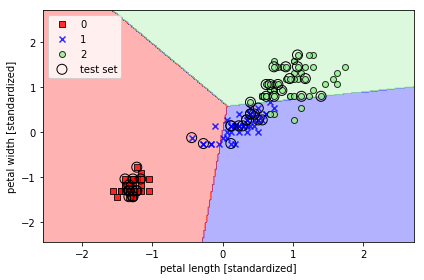

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

# logistic regression (分类模型)

**几率比** (odd ratio): 某件事情发生与不发生的概率的比值. 设 $p$ 为**正事件** (我们需要预测的事件) 发生的概率, 几率比为 $\frac{p}{1-p}$.

- logit 函数 (log-odds, 对数几率): $logit(p) = \log \frac{p}{1-p}$
- logit 函数的反函数: sigmoid 函数 $\phi(z) = \frac{1}{1+e^{-z}}$

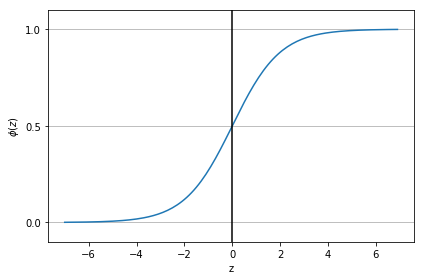

In [17]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

## 通过 logistic 损失函数获取权重 

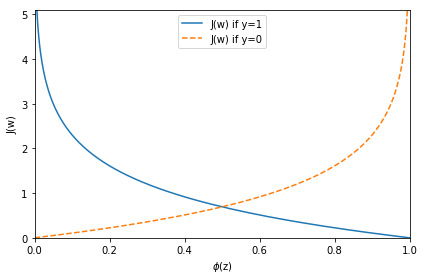

In [18]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

## 使用 scikit-learn 训练 logistic regression 模型

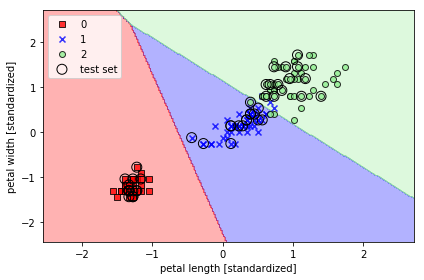

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [20]:
lr.predict_proba(X_test_std[:3, :])  # 预测前 3 个样本属于各个类别的概率

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [21]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [22]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [23]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [24]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

## 通过正则化处理过拟合问题

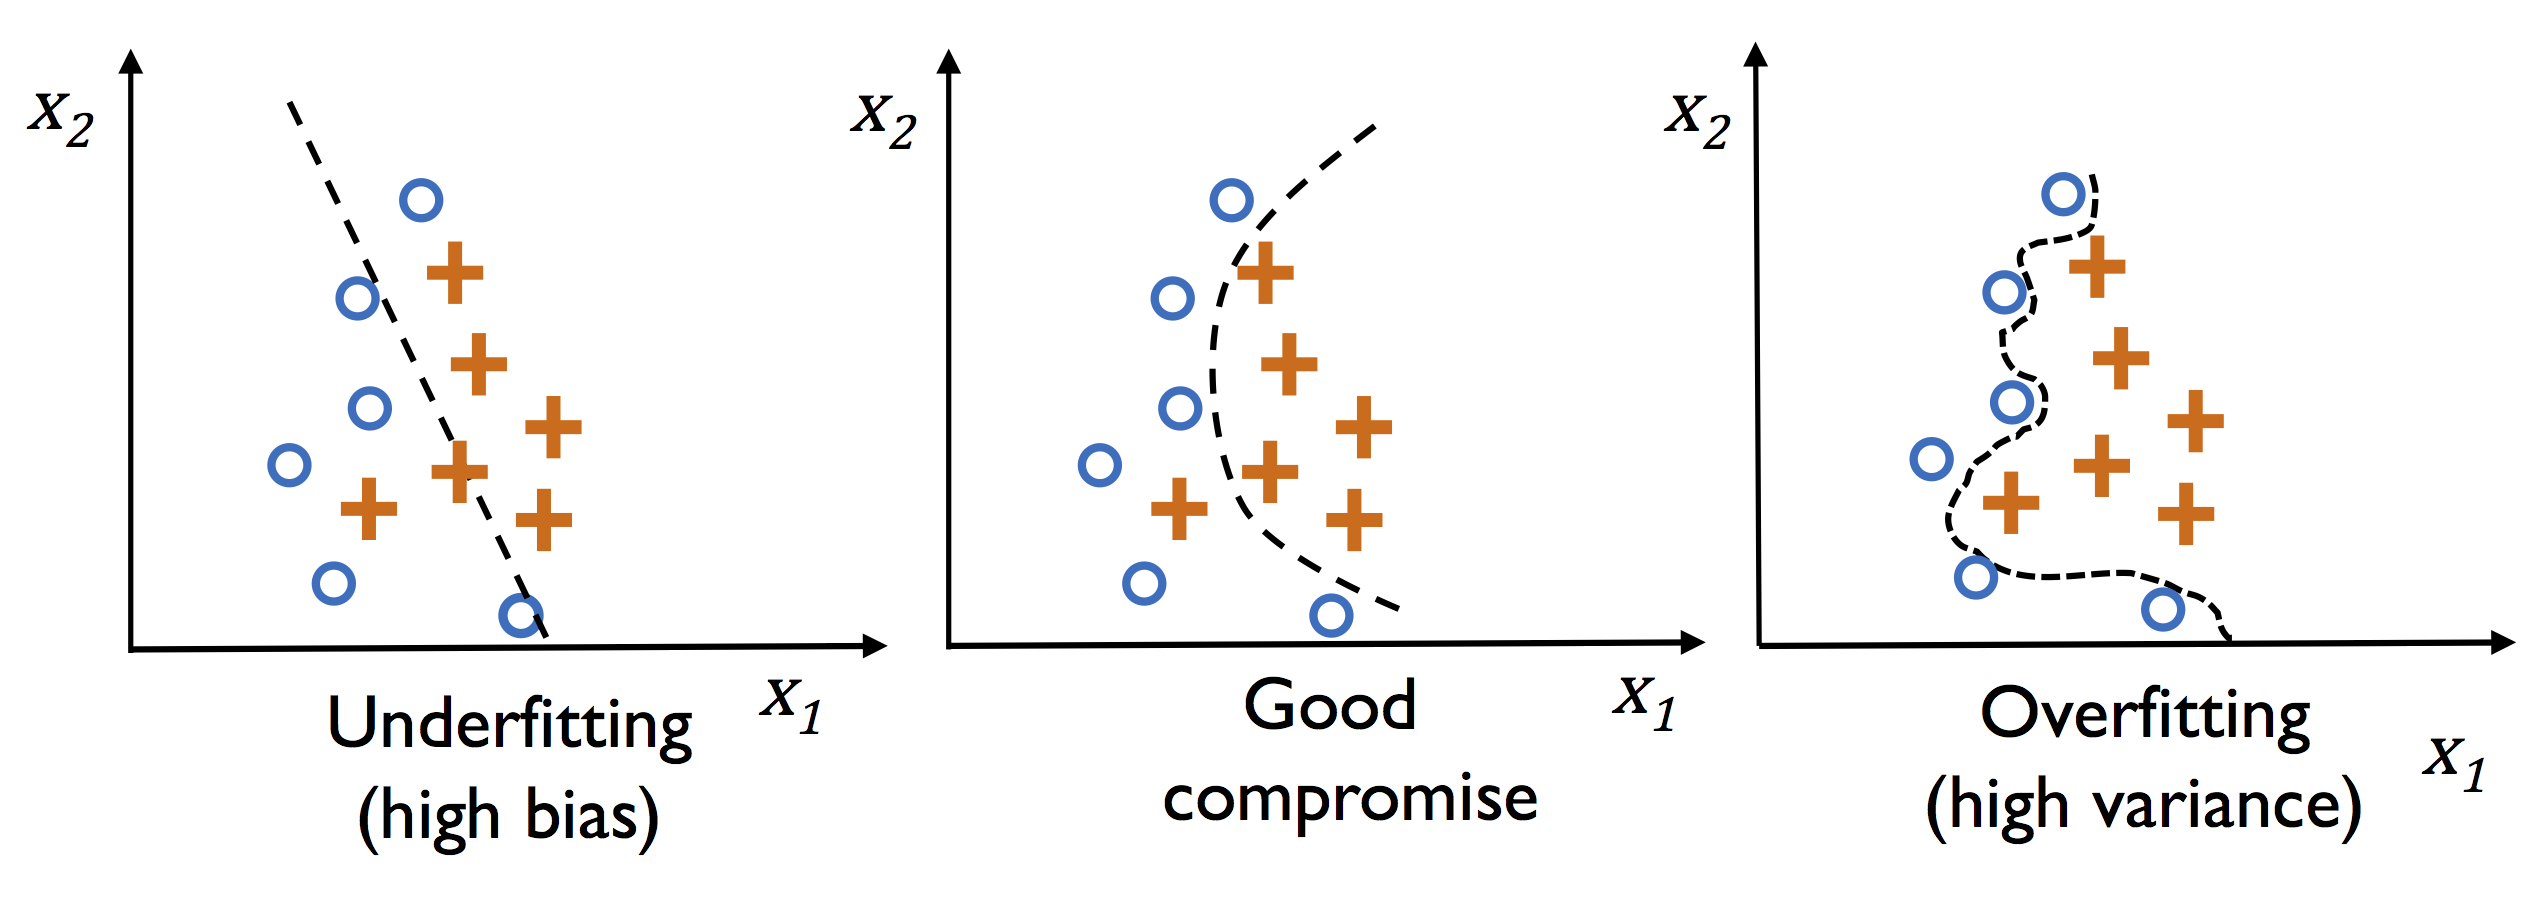

In [25]:
Image(filename='images/03_07.png', width=700) 

- **方差**可用来衡量模型对特定样本实例预测的一致性 (或者说变化), 对训练数据中的随机性是敏感的;
- **偏差**衡量的是系统的误差, 从总体上衡量预测值与实际值之间的差异.

**偏差 - 方差权衡** (bias-variance tradeoff) 就是通过**正则化**来调整模型的复杂度. 正则化是解决共线性 (特征间高度相似) 的一个很有用的方法, 它可以过滤掉数据中的噪声, 并最终防止过拟合. 正则化背后的概念是引入额外的信息 (偏差) 来对极端参数权重做出惩罚 (shrinkage) 或权重衰减 (weight decay), 可写作:
$$
\frac{\lambda}{2} ||\mathcal{w}||^2 = \frac{\lambda}{2}\displaystyle\sum_{j=1}^mw_j^2 
$$

其中, $\lambda$ 为正则化系数.

> 特征缩放之所以重要, 其中一个原因就是正则化. 为了使得正则化起作用, 需要确保所有特征的衡量标准保持统一.

scikit-learn 库中的 LogisticRegression 类, 其中的参数 `C` 是支持向量机中的约定, 即正则化系数的倒数:
$$
C = \frac{1}{\lambda}
$$

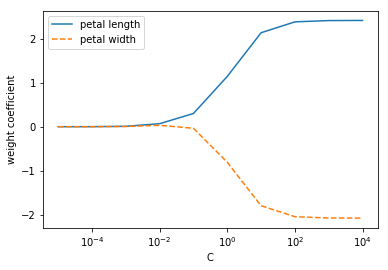

In [26]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

**一对多** (One-vs.-All, OvA), 有时也称为一对其他 (One-vs.-Rest, OvR), 是一种将二值分类器扩充到多分类任务上的一种计术. 我们可以使用 OvA 针对每个类别训练一个分类器, 其中分类器所对应类别的样本为正类别, 其他所有类别样本为负类别. 

# 使用支持向量机最大化分类间隔 (Maximum margin classification with support vector machines)

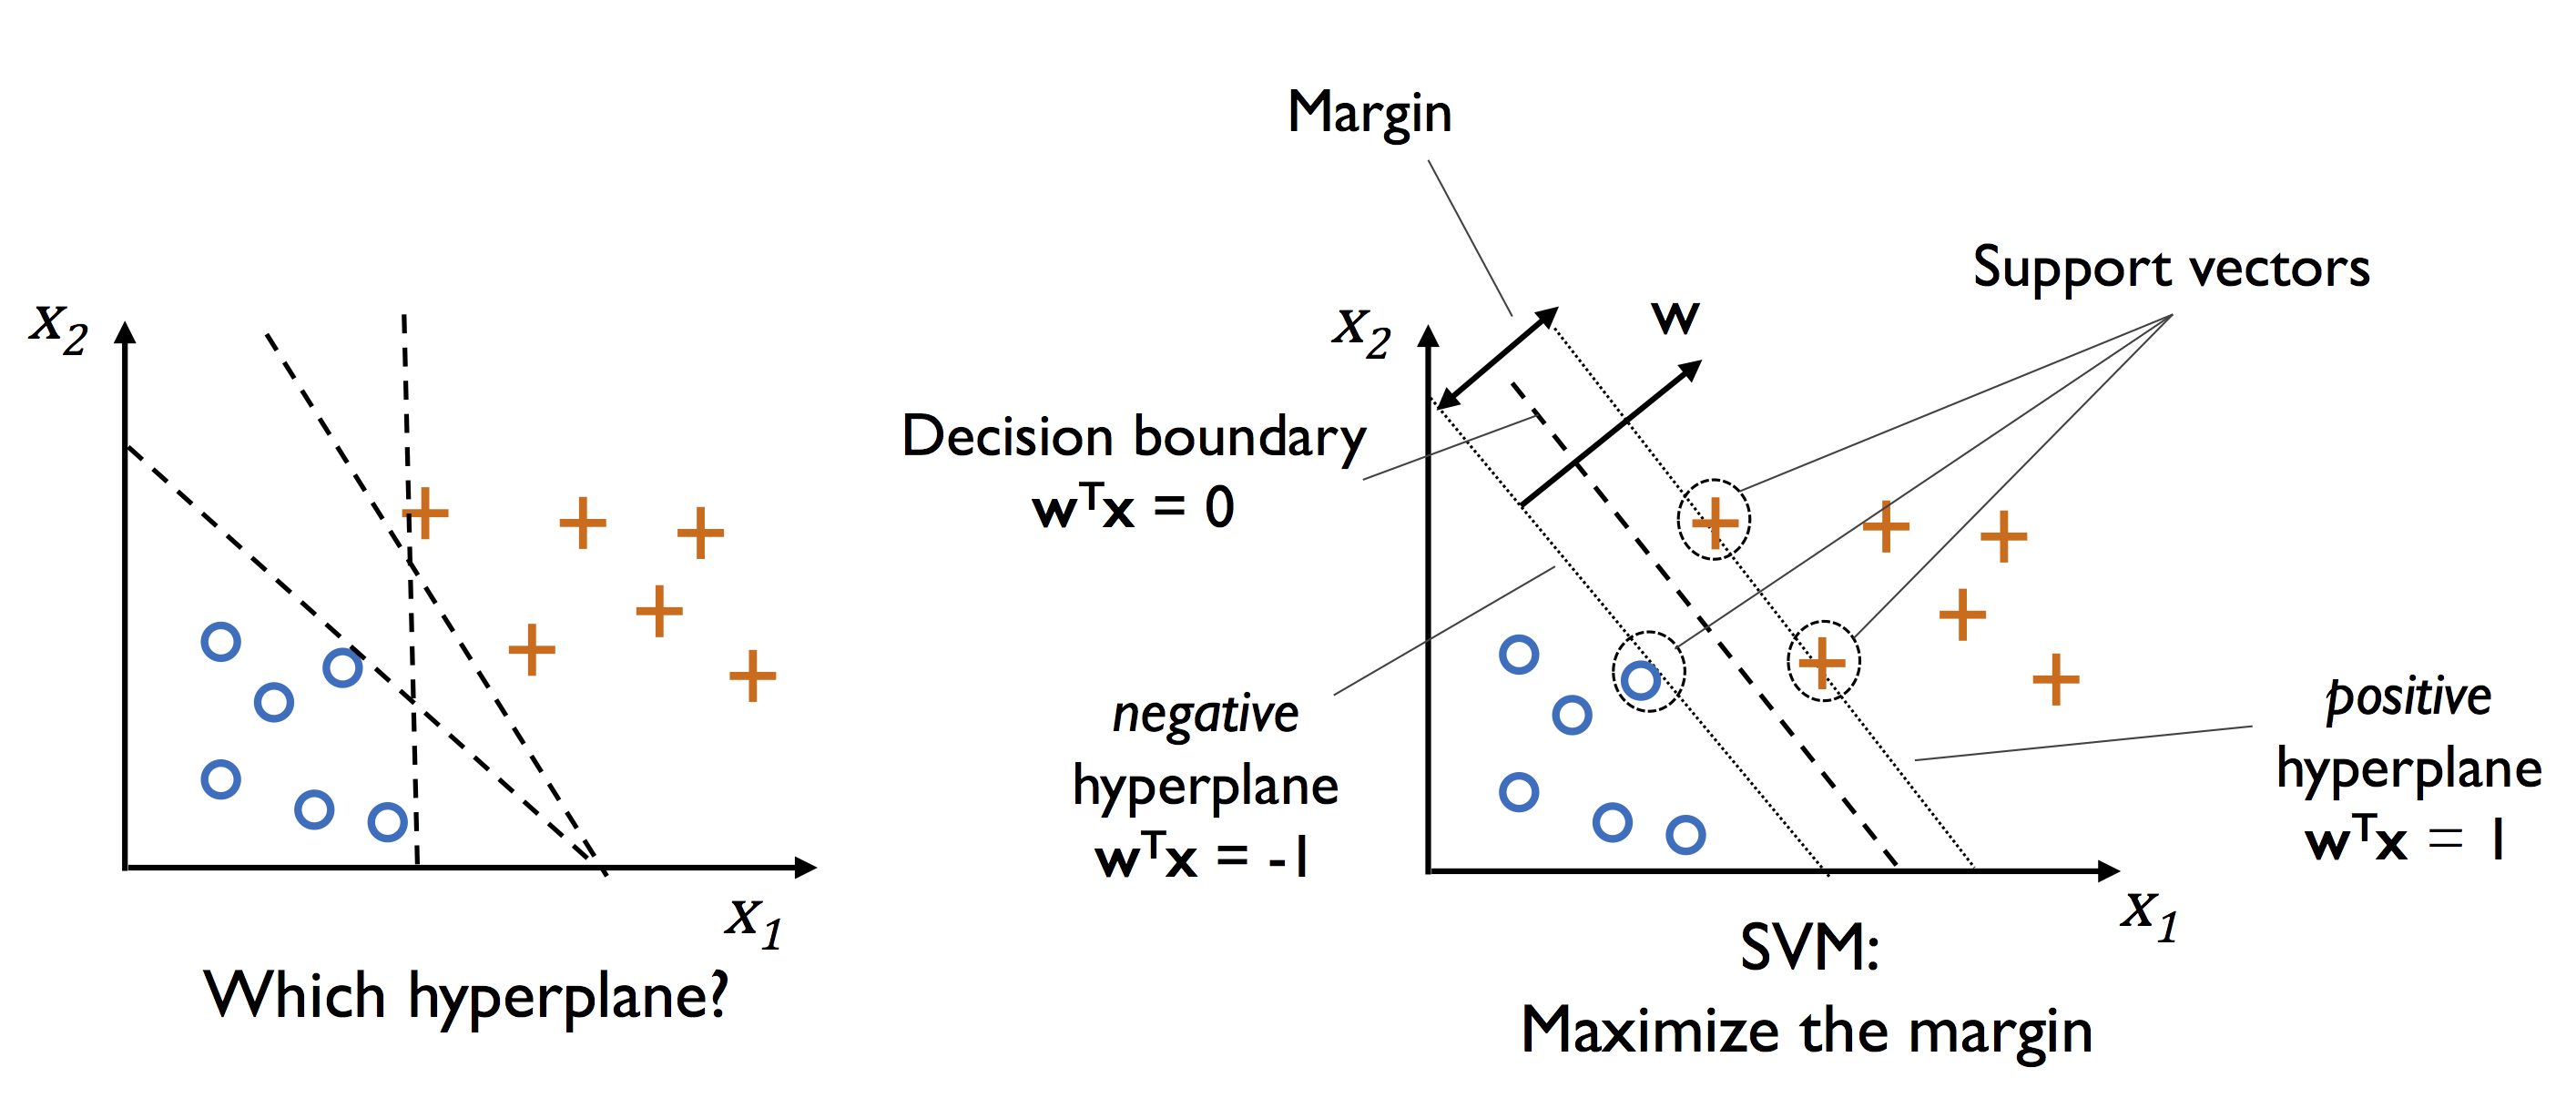

In [27]:
Image(filename='images/03_09.png', width=700) 

Input: 设有数据集 $\mathcal{D} = \{x_i,y_i \}_{i=1}^m$, 令 $X = [x_1^T; \cdots; x_m^T], y = [y_1; \cdots; y_m]$, 其中 $y_i\in \{1,-1\}$

可以将数据集 $\mathcal{D}$ 看作线性空间中的点. 数据集 $\mathcal{D}$ 中的点 $x_i$ 到超平面 $y = x^Tw + b$ 的距离为
$$
\frac{|b + (x_j, w)|}{||w||}
$$

因而, 正负超平面的距离为
$$
d = \frac{2}{||w||}
$$

$d$ (被称为间隔, margin) 越大, 则各个样本对于自身类别的预测估计愈自信, 因而, 我们需要将 $d$ 最大化. 即
$$
\begin{cases}
\displaystyle \max_{w,b} &\frac{2}{||w||}\\
s.t. &y_i(w^Tx_i + b) \geq 1, & i= 1,2,⋯,m
\end{cases}
$$
等价于
$$
\begin{cases}
\displaystyle \min_{w,b} &\frac{||w||^2}{2}\\
s.t.&y_i(w^Tx_i + b) \geq 1, & i= 1,2,⋯,m
\end{cases}
$$

该问题可以通过**拉格朗日乘子法**求解:
引入拉格朗日乘子 $λ = \{λ_1,\cdots,λ_m\}, λ  \succeq 0$, 有
$$
L(w, b ,λ) = \frac{||w||^2}{2} + ∑_{i=1}^m λ_i(1-y_i(w^Tx_i+b))
$$

由 $\frac{∂L}{∂w}=0$, $\frac{∂L}{∂b}=0$ 得
$$
\begin{cases}
w = \sum_{i=1}^m λ_iy_ix_i = [x_1,\cdots,x_m][λ_1y_1;\cdots;λ_my_m] = X^T (λ \circ y)\\
0 = \sum_{i=1}^m λ_iy_i = \vec{1}^T (λ \circ y)
\end{cases}
$$

消去 $w,b$, 得到 (7) 式的对偶问题


$$
\begin{cases}
\displaystyle\max_{λ} & \vec{1}^Tλ - 0.5 (λ ∘ y)^T XX^T (λ ∘ y)\\
s.t. &\vec{1}^T (λ \circ y)=0, λ  \succeq 0
\end{cases}
$$

为了更加高效解决 (9) 的问题, 人们提出了一种高效的算法: **SMO**. SMO 之所以高效, 恰由于在固定其他参数, 仅仅优化两个的参数的过程便将二次规划问题转换为具有闭式解的二次规划问题.

前面的讨论是建立在数据集是线性可分的情况下的, 对于线性不可分的情况, 我们可以引入**核函数**.

令 $φ(x)$ 表示将 $x$ 映射后的特征向量, 于是在特征空间中划分超平面所对应的模型可以表示为
$$f(x) = w^T\phi(x) + b$$
这样 (9) 便可转换为

$$
\begin{cases}
\displaystyle\max_{λ} & \vec{1}^Tλ - 0.5 (λ ∘ y)^T \phi(X)\phi(X)^T (λ ∘ y)\\
s.t. &\vec{1}^T (λ \circ y)=0, λ  \succeq 0
\end{cases}
$$

更多精彩见 [SVM](https://www.jianshu.com/p/82e09bb8f74c)

示例见: [sklearn-svm](https://nbviewer.jupyter.org/github/q735613050/AI/blob/master/ML/SVM.ipynb)